In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
#import utils


In [5]:
df = pd.read_csv('train.csv')
df_t = pd.read_csv('test.csv')


In [6]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [7]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


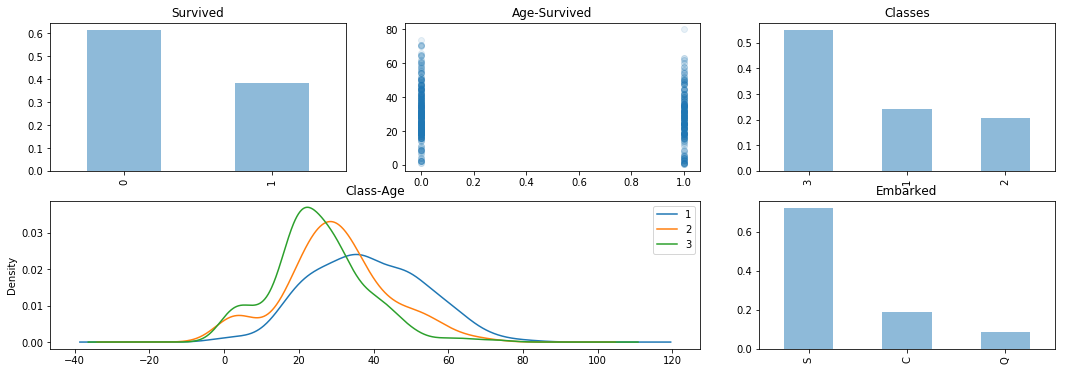

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18, 6)) # create figure

plt.subplot2grid((2,3), (0,0))
df.Survived.value_counts(normalize=True).plot(kind='bar', alpha=0.5) # data that we want to plot
plt.title("Survived")

plt.subplot2grid((2,3), (0,1))
plt.scatter(df.Survived, df.Age, alpha=0.1)
plt.title("Age-Survived")

plt.subplot2grid((2,3), (0,2))
df.Pclass.value_counts(normalize=True).plot(kind='bar', alpha = 0.5)
plt.title("Classes")

plt.subplot2grid((2,3), (1,0), colspan=2)
for x in [1,2,3]:
    # find list of age where Pclass value is 1,2,3
    df.Age[df.Pclass == x].plot(kind="kde")
plt.title("Class-Age")
plt.legend(("1", "2", "3"))

# where did the passengers got on the ship (3 different locations)
plt.subplot2grid((2,3), (1,2))
df.Embarked.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title("Embarked")

plt.show() # show figure



We can see thst 40% of people survived while around 60% dies

and bulk of both survived and died people were between 20-60 while some younger people
survived and older people died, but there isn't major age difference here.

Half of passengers where third class and around 25% were first and second class



In [10]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

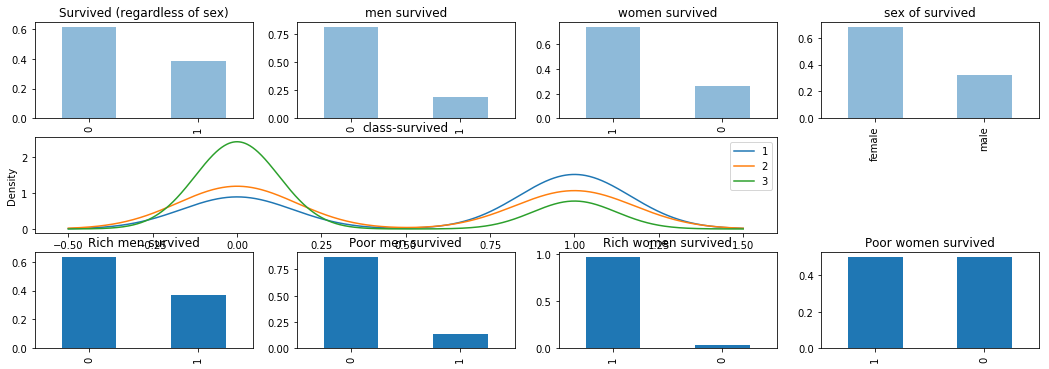

In [11]:
fig = plt.figure(figsize=(18,6))

plt.subplot2grid((3,4), (0,0))
df.Survived.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title("Survived (regardless of sex)")

plt.subplot2grid((3,4), (0,1))
df.Survived[df.Sex=="male"].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("men survived")

plt.subplot2grid((3,4), (0,2))
df.Survived[df.Sex=="female"].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("women survived")

plt.subplot2grid((3,4), (0,3))
df.Sex[df.Survived==1].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("sex of survived")

plt.subplot2grid((3,4), (1,0), colspan=3)
for x in [1,2,3]:
    df.Survived[df.Pclass == x].plot(kind="kde")
plt.title("class-survived")
plt.legend(("1", "2", "3"))

plt.subplot2grid((3,4), (2,0))
df.Survived[(df.Sex =='male') & (df.Pclass == 1)].value_counts(normalize=True).plot(kind="bar")
plt.title("Rich men survived")

plt.subplot2grid((3,4), (2,1))
df.Survived[(df.Sex =='male') & (df.Pclass == 3)].value_counts(normalize=True).plot(kind="bar")
plt.title("Poor men survived")

plt.subplot2grid((3,4), (2,2))
df.Survived[(df.Sex =='female') & (df.Pclass == 1)].value_counts(normalize=True).plot(kind="bar")
plt.title("Rich women survived")

plt.subplot2grid((3,4), (2,3))
df.Survived[(df.Sex =='female') & (df.Pclass == 3)].value_counts(normalize=True).plot(kind="bar")
plt.title("Poor women survived")

plt.show()